# Analysis of results from baseline paper 
Initial exploratory data followed by calculations used in first draft of paper

Needed to rerun the analysis after new results, moved to new notebook 

Author: Sahar H. El Abbadi
Date: July 29, 2024



In [31]:
# Load Jianan's results 
# Results from Jianan sent on Sept 17, 2024

# Setup 
import pandas as pd
import pathlib

# load treatment train summary data
tt_data = pd.read_excel(pathlib.PurePath('01_raw_data', 'baseline_paper', 'result_summary.xlsx'), skiprows=1)

# add separate spreadsheets for flow and count
tt_flow = pd.read_excel(pathlib.PurePath('01_raw_data', 'baseline_paper', 'TT_flow_MG_per_day.xlsx'))
tt_count = pd.read_excel(pathlib.PurePath('01_raw_data', 'baseline_paper', 'TT_count.xlsx'))

# rename flow column to indicate units are MGD 
tt_flow.rename(columns={'flow': 'flow_mgd'}, inplace=True)

# Convert to billion m3/yr 
def mgd_to_Bm3_yr(mgd): 
    gallons_per_m3 = 264.172
    days_per_year = 365
    return mgd * days_per_year * (1/gallons_per_m3) * (1/1000 )

tt_flow['flow_Bm3yr'] = tt_flow['flow_mgd'].apply(mgd_to_Bm3_yr)

tt_data = pd.merge(tt_flow, tt_data, how='inner')
tt_data = pd.merge(tt_count, tt_data, how='inner')


# load facility level data 
facility_data = pd.read_excel(pathlib.PurePath('01_raw_data', 'baseline_paper', 'WWTP_kg_CO2_eq_per_day.xlsx'))

# total number of facilities
total_facilities = len(facility_data)

display(tt_data)

,code,count,flow_mgd,flow_Bm3yr,electricity_total_vol,electricity_chem_vol,electricity_other_vol,gas_total_vol,gas_chem_vol,gas_other_vol,...,total_emissions_loc_vol,methane_annual,nitrous_oxide_annual,noncombustion_co2_annual,electricity_annual,onsite_gas_annual,upstream_gas_annual,landfill_methane_annual,land_applied_n2o_annual,total_emissions_annual
0,*C4,17,64.090333,0.088552,0.278287,0.028023,0.250264,0.357798,0.192690,0.165108,...,0.348239,0.009941,0.004221,0.001860,0.008162,0.001784,0.000402,0.001965,0.002503,0.030837
1,*C6,8,144.992500,0.200333,0.306533,0.025704,0.280829,0.684446,0.000000,0.684446,...,0.447948,0.022489,0.009548,0.004207,0.044033,0.007720,0.001741,0.000000,0.000000,0.089738
2,*C5,21,289.976000,0.400653,0.340162,0.025704,0.314458,1.783722,0.000000,1.783722,...,0.459915,0.044976,0.019096,0.008414,0.062469,0.040235,0.009076,0.000000,0.000000,0.184266
3,*A4,55,603.227429,0.833465,0.352115,0.022872,0.329244,0.357798,0.192690,0.165108,...,0.390282,0.093562,0.039725,0.017503,0.111860,0.016789,0.003787,0.018495,0.023563,0.325285
4,*A6,59,997.496000,1.378216,0.380066,0.020553,0.359513,0.684446,0.000000,0.684446,...,0.392912,0.154713,0.065689,0.028943,0.227082,0.053108,0.011980,0.000000,0.000000,0.541516
5,*B4,6,168.854762,0.233303,0.381869,0.022872,0.358998,0.357798,0.192690,0.165108,...,0.365733,0.026190,0.011120,0.004899,0.025585,0.004700,0.001060,0.005177,0.006596,0.085326
6,*C3,366,460.409400,0.636136,0.384070,0.025704,0.358366,0.165108,0.000000,0.165108,...,0.406646,0.071410,0.030320,0.013359,0.113393,0.005913,0.001334,0.010093,0.012859,0.258682
7,*B6,3,37.230000,0.051440,0.410115,0.020553,0.389563,0.684446,0.000000,0.684446,...,0.366681,0.005774,0.002452,0.001080,0.007126,0.001982,0.000447,0.000000,0.000000,0.018862
8,*A5,86,1668.520000,2.305353,0.414329,0.020553,0.393776,1.783722,0.000000,1.783722,...,0.475140,0.258790,0.109879,0.048412,0.394545,0.231511,0.052224,0.000000,0.000000,1.095361
9,A4,32,78.486667,0.108443,0.414355,0.023432,0.390923,0.403656,0.238548,0.165108,...,0.442803,0.012173,0.005169,0.002277,0.022659,0.002464,0.000556,0.001196,0.001524,0.048019


In [4]:
# print(tt_data.columns)

## Dataframe columns 

### Treatment Train 

- code: treatment trade code, new naming convention
- count: number of assigned treatment trains in the US
- flow_Mm3yr: total flow, in billion m3 per year
- electricity_total_vol: total electricity needed per treatment train, kWh / m3 
- electricity_chem_vol: total electricity needed to for chemical production, kWh / m3
- electricity_other_vol: electricity for onsite processes (excluding chemical production), kWh / m3
- gas_total_vol: total natural gas, MJ / m3
- gas_chem_vol: total natural gas for chemical production, MJ/m3
- gas_other_vol: total natural gas for onsite processes (excluding chemical production), MJ / m3
- methane_vol: methane onsite emissions, kg CO2 eq / m3
- nitrous_oxide_vol: nitrous oxide onsite emissions, kg CO2 eq / m3 
- noncombustion_co2_vol: CO2 emissions, kg CO2 eq / m3
- electricity_national_vol: electricity emissions using national average carbon intensity of the grid, kg CO2 eq / m3
- electricity_stdev_vol: standard deviation of the electricity emissions, using national average carbon intensity of the grid, kg CO2 eq / m3 
- electricity_loc_vol: flow weighted electricity emissions (based on locations of current trains), kg CO2 / m3  
- electricity_loc_stdev_vol: standard deviation of electricity emissions, based on location of current trains, kg CO2 / m3
- onsite_gas_vol: onsite gas emissions (including chemicals), kg CO2 / m3
- upstream_gas_vol: upstream gas emissions (from natural gas distribution), kg CO2 / m3
- landfill_methane_vol: emissions associated with landfilled biosolids, kg CO2 / m3
- land_applied_n2o_vol: emissions associated with land application of biosolids, kg CO2 / m3
- total_emissions_national_ave_vol: total emissions using national average of electricity carbon intensity, kg CO2 / m3 
- total_emissions_loc_vol: total emissions using flow weighted location specific electricity carbon intensity, kg CO2 / m3 
- methane_annual: total methane emissions, million tons CO2 / year
- nitrous_oxide_annual: total nitrous oxide emissions, million tons CO2 / year
- noncombustion_co2_annual: total noncombustion CO2, million tons CO2 / year
- electricity_annual: total electricity emissions, using location specific; million tons CO2 / year
- onsite_gas_annual: onsite natural gas emission from combustion (including chemicals), million tons CO2 / year
- upstream_gas_annual: upstream natural gas emissions, million tons CO2 / year
- landfill_methane_annual: landfill emissions from biosolids, million tons CO2 / year
- land_applied_n2o_annual: emissions from land application of biosolids, million tons CO2 / year 
- total_emissions_annual: total annual emissions, million tons CO2 / year 

# Main Text analysis 

Analysis for calculations appearing in the main text 

In [ ]:
# Number and throughput of U.S. WWTPs by treatment train type

In [56]:
# For the most abundant treatment trains, what percentage of total plants does it represent? and what fraction of total emissions? 

# Proportion of count, emissions, and flow
tt_data['count_fraction'] = tt_data['count'] / total_facilities * 100
tt_data['emissions_fraction'] = tt_data['total_emissions_annual'] / tt_data['total_emissions_annual'].sum() * 100
tt_data['flow_fraction'] = tt_data['flow_Bm3yr'] / tt_data['flow_Bm3yr'].sum() * 100


relevant_cols = ['code', 'count', 'count_fraction', 'flow_Bm3yr', 'flow_fraction', 'total_emissions_annual', 'emissions_fraction']

sorted_by_count = tt_data.sort_values(by='count_fraction', ascending=False)
sorted_by_emissions = tt_data.sort_values(by='emissions_fraction', ascending=False)
sorted_by_emissions = tt_data.sort_values(by='flow_fraction', ascending=False)


#### Uncomment code to view dataframes (text from paper printed below)

# print('Facilities by count (not combining primary and no primary):')
# display(sorted_by_count[relevant_cols].head(10))
# 
# print('Facilities by emissions fraction (not combining primary and no primary):')
# display(sorted_by_emissions[relevant_cols].head(10))
# 
# print('Facilities by flow fraction (not combining primary and no primary):')
# display(sorted_by_emissions[relevant_cols].head(10))

In [33]:
# What is the most common liquid treatment train? 

tt_data_combining_trains_liquid = tt_data

# Define a function to create a grouping key based on the presence of specific letters
def combine_liquid_treatment(label):
    if 'A' in label: return 'A_combined'
    if 'B' in label: return 'B_combined'
    if 'C' in label: return 'C_combined'
    if 'D' in label: return 'D_combined'
    if 'E' in label: return 'E_combined'
    if 'F' in label: return 'F_combined'
    if 'G' in label: return 'G_combined'
    if 'L' in label: return 'L_combined'
    return label  # Leave other labels unchanged

# Define a custom aggregation function to concatenate labels
def concat_labels(labels):
    return ', '.join(labels)

# Apply combined treatment trains
tt_data_combining_trains_liquid['tt_liquids'] = tt_data_combining_trains_liquid['code'].apply(combine_liquid_treatment)

# Group by combined treatment trains and aggregate
aggregated_columns = {col: 'sum' for col in tt_data_combining_trains_liquid.columns if col not in ['code', 'tt_liquids']}
tt_grouped_liquids = tt_data_combining_trains_liquid.groupby('tt_liquids').agg(aggregated_columns).reset_index()

# Apply the label concatenation separately
tt_grouped_liquids['labels_combined'] = tt_data_combining_trains_liquid.groupby('tt_liquids')['code'].apply(concat_labels).values


tt_grouped_liquids['count_fraction'] = tt_grouped_liquids['count'] / total_facilities * 100
tt_grouped_liquids['flow_fraction'] = tt_grouped_liquids['flow_Bm3yr'] / tt_grouped_liquids['flow_Bm3yr'].sum() * 100
tt_grouped_liquids['emissions_fraction'] = tt_grouped_liquids['total_emissions_annual'] / tt_grouped_liquids['total_emissions_annual'].sum() * 100

relevant_cols = ['tt_liquids', 'count', 'count_fraction', 'flow_Bm3yr', 'flow_fraction', 'total_emissions_annual', 'emissions_fraction', 'labels_combined']
liquids_sorted_by_count = tt_grouped_liquids.sort_values(by='count_fraction', ascending=False)

print('Liquid treatment by count:')
display(liquids_sorted_by_count[relevant_cols].head(10))

Liquid treatment by count:


,tt_liquids,count,count_fraction,flow_Bm3yr,flow_fraction,total_emissions_annual,emissions_fraction,labels_combined
7,L_combined,7821,49.290981,5.037020,7.485844,2.490881,5.924385,"L-a, L-u, L-n, L-f"
0,A_combined,6707,42.270120,28.449444,42.280573,14.862670,35.349807,"*A4, *A6, *A5, A4, A6, A5, *A3, A3, *A1e, A1e,..."
4,E_combined,1804,11.369509,14.017887,20.832895,11.189859,26.614286,"*E3, E3, *E1e, *E1"
2,C_combined,1760,11.092204,7.297319,10.845021,4.146226,9.861504,"*C4, *C6, *C5, *C3, *C1e, *C1"
6,G_combined,269,1.695343,5.821328,8.651454,5.310364,12.630324,"*G4, *G6, *G5, *G3, *G1e-p, *G1e, *G1-p, *G1"
5,F_combined,147,0.926451,1.360528,2.021970,1.036428,2.465070,"F4, F6, F3, F5, F1e, F1"
1,B_combined,88,0.554610,5.238214,7.784851,2.911591,6.925013,"*B4, *B6, *B5, *B3, *B1e, *B1"
3,D_combined,4,0.025210,0.065533,0.097393,0.096540,0.229613,"*D3, *D1e"


In [37]:
# Text in paper: find the flow rate and facilities data for the two most common treatment trains  
"""
Paragraph starting with: "The total number of facilities and the corresponding estimated total flow treated nationwide for each treatment train is depicted in Figure 2A"

9/18/24 updated text reads: 

Activated sludge: 
"Basic activated sludge (liquid code A) dominates liquids handling in the United States, accounting for 6,707 facilities (42%) and treating 28 billion m3 / year (42% of estimated annual flow)."

Lagoons: 
"However, lagoons are the most abundant treatment technology, with all categories of lagoons (aerobic, anaerobic, facultative, and unclassified) totaling 7,821 in number, meaning 49% of all facilities include a lagoon."

"""


# get n most common liquid treatment 
n = 3 

liquids_top_by_count = liquids_sorted_by_count.head(n)
result = liquids_top_by_count[['tt_liquids', 'count','count_fraction', 'flow_Bm3yr', 'flow_fraction']]
display(result)

,tt_liquids,count,count_fraction,flow_Bm3yr,flow_fraction
7,L_combined,7821,49.290981,5.037020,7.485844
0,A_combined,6707,42.270120,28.449444,42.280573
4,E_combined,1804,11.369509,14.017887,20.832895


In [49]:
# What is the most common solids treatment train? 

tt_data_combining_trains_solids = tt_data

# Combine solids treatment
def combine_tt_solids(solids_label): 
    if solids_label in ['A1', 'A1e', '*A1', '*A1e', '*B1', '*B1e', '*C1', '*C1e', '*D1e', '*E1', '*E1e', 'F1', 'F1e', '*G1', '*G1e', '*G1-p', '*G1e-p']: return '1'
    if solids_label in ['*A2']: return '2'
    if solids_label in ['A3', '*A3', 'E3', '*E3', '*B3', '*C3', '*D3', 'F3', '*G3']: return '3'
    if solids_label in ['A4', '*A4', '*B4', '*C4', 'F4', '*G4']: return '4'
    if solids_label in ['A5', '*A5', '*B5', '*C5', 'F5', '*G5']: return '5'
    if solids_label in ['A6', '*A6', '*B6', '*C6', 'F6', '*G6']: return '6'
    if solids_label in ['L-a', 'L-n', 'L-f', 'L-u']: return 'L-all'
    return solids_label 

# Define a custom aggregation function to concatenate labels
def concat_labels(labels):
    return ', '.join(labels)


# Apply combined treatment trains
tt_data['tt_solids'] = tt_data['code'].apply(combine_tt_solids)

# Group by combined treatment trains and aggregate
aggregated_columns = {col: 'sum' for col in tt_data_combining_trains_solids.columns if col not in ['code', 'tt_solids']}
tt_solids_grouped = tt_data_combining_trains_solids.groupby('tt_solids').agg(aggregated_columns).reset_index()

# Apply the label concatenation separately
tt_solids_grouped['labels_combined'] = tt_data_combining_trains_solids.groupby('tt_solids')['code'].apply(concat_labels).values


tt_solids_grouped['count_fraction'] = tt_solids_grouped['count'] / total_facilities * 100
tt_solids_grouped['flow_fraction'] = tt_solids_grouped['flow_Bm3yr'] / tt_solids_grouped['flow_Bm3yr'].sum() * 100
tt_solids_grouped['emissions_fraction'] = tt_solids_grouped['total_emissions_annual'] / tt_solids_grouped['total_emissions_annual'].sum() * 100

relevant_cols = ['tt_solids', 'count', 'count_fraction', 'flow_Bm3yr', 'flow_fraction', 'total_emissions_annual', 'emissions_fraction', 'methane_annual', 'labels_combined']

solids_sorted_by_count = tt_solids_grouped.sort_values(by='count_fraction', ascending=False)
solids_sorted_by_emissions = tt_solids_grouped.sort_values(by='emissions_fraction', ascending=False)

# How much methane is coming from facilities with AD: 
ad_codes = ['1', '2']
methane_total_from_ad = solids_sorted_by_emissions.loc[solids_sorted_by_emissions['tt_solids'].isin(ad_codes), 'methane_annual'].sum()


# Print all results 
# print('Facilities by count (combined parimary + lagoons):')
# display(solids_sorted_by_count[relevant_cols].head(10))
# 
# print('Facilities by emissions fraction (combined primary + lagoons):')
# display(solids_sorted_by_emissions[relevant_cols].head(10))
# 
# print(f'Total methane emissions coming from facilities with AD: {methane_total_from_ad:.2f} MMT / year')
# print(f"Fraction of total methane emissions: {methane_total_from_ad/sorted_by_emissions['methane_annual'].sum()*100:.2f}%")


In [57]:
# Text in paper: find the flow rate and facilities data for the two most common treatment trains  
"""
Paragraph starting with: "The total number of facilities and the corresponding estimated total flow treated nationwide for each treatment train is depicted in Figure 2A"

9/18/24 updated text reads: 

"In terms of solids treatment, 42% of facilities use aerobic digestion (solids code 3) while 22% use anaerobic digestion (solids code 1). However, facilities with anaerobic digestion treat 63% of total wastewater flow while aerobic digestion only treats 19%, indicative of the large size of facilities with anaerobic digestion. "

"""

n = 3 

# get n most common liquid treatment 

top_by_count = solids_sorted_by_count.head(n)
result = top_by_count[['tt_solids', 'count','count_fraction', 'flow_Bm3yr', 'flow_fraction']]
display(result)


,tt_solids,count,count_fraction,flow_Bm3yr,flow_fraction
6,L-all,7821,49.290981,5.037020,7.485844
2,3,6790,42.793219,12.556158,18.660525
0,1,3605,22.720111,42.185462,62.694564


In [54]:
# How many facilities use CHP? 

tt_chp = tt_data
tt_chp['chp'] = tt_data['code'].str.contains('e')

# Group by combined treatment trains and aggregate
aggregated_columns = {col: 'sum' for col in tt_chp.columns if col not in ['code', 'tt_solids', 'chp']}
tt_chp_grouped = tt_chp.groupby('chp').agg(aggregated_columns).reset_index()

tt_chp_grouped['count_fraction'] = tt_chp_grouped['count'] / total_facilities * 100
tt_chp_grouped['flow_fraction'] = tt_chp_grouped['flow_Bm3yr'] / tt_chp_grouped['flow_Bm3yr'].sum() * 100
tt_chp_grouped['emissions_fraction'] = tt_chp_grouped['total_emissions_annual'] / tt_chp_grouped['total_emissions_annual'].sum() * 100

relevant_cols = ['count', 'count_fraction', 'flow_Bm3yr', 'flow_fraction', 'total_emissions_annual', 'emissions_fraction', 'methane_annual']

"""
Text from paper: 
"Additionally, only 440 facilities recover energy from biogas production"
"""

display(tt_chp_grouped[relevant_cols])


,count,count_fraction,flow_Bm3yr,flow_fraction,total_emissions_annual,emissions_fraction,methane_annual
0,18160,114.451377,53.178345,79.031804,32.845497,78.120686,13.422332
1,440,2.773051,14.108927,20.968196,9.199061,21.879314,5.369078


In [69]:
# What fraction of anaerobic digestion facilities have CHP? 

facilities_chp = facility_data

all_ad = facilities_chp[facilities_chp['TT'].str.contains(r'[12]', na=False)] # total number of facilities with anaerobic digestion


In [21]:
# Fraction of facilities that use some form of BNR 
nutrient_removal_liquids = ['D_combined', 'E_combined', 'F_combined', 'G_combined']
combined_nutrient_removal_count = tt_grouped_liquids.loc[tt_grouped_liquids['tt_liquids'].isin(nutrient_removal_liquids), 'count_fraction'].sum()

liquids_sorted_by_emissions = tt_grouped_liquids.sort_values(by='emissions_fraction', ascending=False)
liquids_sorted_by_flow = tt_grouped_liquids.sort_values(by='flow_fraction', ascending=False)
combined_nutrient_removal_flow = tt_grouped_liquids.loc[tt_grouped_liquids['tt_liquids'].isin(nutrient_removal_liquids), 'flow_fraction'].sum()


# ## Comment or uncomment to print results
# print(f'Proportion of facilities that use some form of nutrient removal: {combined_nutrient_removal_count:.2f}% ')
# 
# print(f'\nLiquid treatment by emissions fraction:')
# display(liquids_sorted_by_emissions[relevant_cols].head(10))
# 
# print('Liquid treatment by flow fraction:')
# display(liquids_sorted_by_flow[relevant_cols].head(10))
# 
# # Fraction of flow treated with BNR 
# print(f'Proportion of flow treated by BNR: {combined_nutrient_removal_flow} ')


Liquid treatment by count:


,tt_liquids,count,count_fraction,flow,flow_fraction,total_emissions_annual,emissions_fraction,labels_combined
7,L_combined,7821,49.290981,3645.588000,7.485844,2.490881,5.924385,"L-a, L-u, L-n, L-f"
0,A_combined,6707,42.270120,20590.538340,42.280573,14.862670,35.349807,"*A4, *A6, *A5, A4, A6, A5, *A3, A3, *A1e, A1e,..."
4,E_combined,1804,11.369509,10145.570324,20.832895,11.189859,26.614286,"*E3, E3, *E1e, *E1"
2,C_combined,1760,11.092204,5281.499300,10.845021,4.146226,9.861504,"*C4, *C6, *C5, *C3, *C1e, *C1"
6,G_combined,269,1.695343,4213.237667,8.651454,5.310364,12.630324,"*G4, *G6, *G5, *G3, *G1e-p, *G1e, *G1-p, *G1"
5,F_combined,147,0.926451,984.694417,2.021970,1.036428,2.465070,"F4, F6, F3, F5, F1e, F1"
1,B_combined,88,0.554610,3791.203952,7.784851,2.911591,6.925013,"*B4, *B6, *B5, *B3, *B1e, *B1"
3,D_combined,4,0.025210,47.430000,0.097393,0.096540,0.229613,"*D3, *D1e"


In [13]:
# Combine all lagoons and combine all facilities that are the same with and without primary treatment 

tt_data_combining_trains = tt_data

# treatment trains to combine 
def combine_tt(label): 
    if label in ['A1', '*A1', '*A1e']: return '(*)A1(e)'
    if label in ['A3', '*A3']: return '(*)A3'
    if label in ['A4', '*A4']: return '(*)A4'
    if label in ['A5', '*A5']: return '(*)A5'
    if label in ['A6', '*A6']: return '(*)A6'
    if label in ['E3', '*E3']: return '(*)E3'
    if label in ['L-a', 'L-n', 'L-f', 'L-u']: return 'L-all'
    return label 

# Define a custom aggregation function to concatenate labels
def concat_labels(labels):
    return ', '.join(labels)


# Apply combined treatment trains
tt_data_combining_trains['tt_combined'] = tt_data_combining_trains['code'].apply(combine_tt)

# Group by combined treatment trains and aggregate
aggregated_columns = {col: 'sum' for col in tt_data_combining_trains.columns if col not in ['code', 'tt_combined']}
tt_grouped_primary = tt_data_combining_trains.groupby('tt_combined').agg(aggregated_columns).reset_index()

# Apply the label concatenation separately
tt_grouped_primary['labels_combined'] = tt_data_combining_trains.groupby('tt_combined')['code'].apply(concat_labels).values


tt_grouped_primary['count_fraction'] = tt_grouped_primary['count'] / total_facilities * 100
tt_grouped_primary['flow_fraction'] = tt_grouped_primary['flow'] / tt_grouped_primary['flow'].sum() * 100
tt_grouped_primary['emissions_fraction'] = tt_grouped_primary['total_emissions_annual'] / tt_grouped_primary['total_emissions_annual'].sum() * 100

relevant_cols = ['tt_combined', 'count', 'count_fraction', 'flow', 'flow_fraction', 'total_emissions_annual', 'emissions_fraction', 'labels_combined']

primary_sorted_by_count = tt_grouped_primary.sort_values(by='count_fraction', ascending=False)
primary_sorted_by_emissions = tt_grouped_primary.sort_values(by='emissions_fraction', ascending=False)

# Comment or uncomment to print 

# print('Facilities by count (combined parimary + lagoons):')
# display(primary_sorted_by_count[relevant_cols].head(10))
# 
# print('Facilities by emissions fraction (combined primary + lagoons):')
# display(primary_sorted_by_emissions[relevant_cols].head(10))


In [ ]:
# Additional analysis 


## Energy and Natural Gas Requirements

In [5]:
# Which treatment train has the highest energy requirements

# Find the treatment train with the greatest electricity value 
tt_max_process_energy = tt_data.loc[tt_data['electricity_total_vol'].idxmax()]

# Get the corresponding process code
max_process_code = tt_max_process_energy['code']
max_electricity_needed = tt_max_process_energy['electricity_total_vol']
print(f"The treatment train with the max total electricity requirement per m3 is: {max_process_code}")
print(f"The electricity required is: {max_electricity_needed:.4n} kWh/m3")

# Find the treatment train with the greatest gas requirement
tt_max_process_energy = tt_data.loc[tt_data['gas_total_vol'].idxmax()]

# Get the corresponding process code
max_gas_process_code = tt_max_process_energy['code']
max_gas_needed = tt_max_process_energy['gas_total_vol']
print(f"The treatment train with the max total natural gas requirement per m3 is: {max_gas_process_code}")
print(f"The natural gas required is: {max_gas_needed:.4n} MJ/m3")


The treatment train with the max total electricity requirement per m3 is: *D3
The electricity required is: 1.756 kWh/m3
The treatment train with the max total natural gas requirement per m3 is: *D1e
The natural gas required is: 5.812 MJ/m3


In [6]:
# Electricity consumption with breakdown by percent process and percent chemical 

tt_electricity_sorted = tt_data.sort_values(by='electricity_total_vol', ascending=False)

tt_electricity_sorted['percent_chemical'] = tt_electricity_sorted['electricity_chem_vol']/tt_electricity_sorted['electricity_total_vol'] * 100

tt_electricity_sorted['percent_process'] = tt_electricity_sorted['electricity_other_vol']/tt_electricity_sorted['electricity_total_vol'] * 100

energy_colums = ['code','electricity_total_vol', 'percent_process', 'percent_chemical', 'electricity_chem_vol', 'electricity_other_vol', 'gas_total_vol', 'gas_chem_vol', 'gas_other_vol']

display(tt_electricity_sorted[energy_colums])

,code,electricity_total_vol,percent_process,percent_chemical,electricity_chem_vol,electricity_other_vol,gas_total_vol,gas_chem_vol,gas_other_vol
25,*D3,1.755508,89.503860,10.496140,0.184261,1.571247,4.524251,4.359143,0.165108
44,*D1e,1.567998,84.660096,15.339904,0.240529,1.327469,5.812200,5.812200,0.000000
24,*G3,0.696663,85.670130,14.329870,0.099831,0.596832,2.344693,2.179585,0.165108
23,F5,0.683502,96.993039,3.006961,0.020553,0.662950,1.783722,0.000000,1.783722
22,F3,0.660670,97.664841,2.335159,0.015428,0.645242,0.165108,0.000000,0.165108
21,F6,0.649873,96.837437,3.162563,0.020553,0.629321,0.684446,0.000000,0.684446
43,F1,0.648315,97.620338,2.379662,0.015428,0.632887,0.000000,0.000000,0.000000
20,*G5,0.622714,83.968403,16.031597,0.099831,0.522883,3.963306,2.179585,1.783722
19,F4,0.620965,96.324343,3.675657,0.022825,0.598140,0.354731,0.189623,0.165108
42,*G1,0.595314,83.230530,16.769470,0.099831,0.495483,2.179585,2.179585,0.000000


In [7]:
# Which treatment train has the lowest energy requirements

# Find the treatment train with the greatest electricity value 
tt_min_process_energy = tt_data.loc[tt_data['electricity_total_vol'].idxmin()]

# Get the corresponding process code
min_process_code = tt_min_process_energy['code']
min_electricity_needed = tt_min_process_energy['electricity_total_vol']
print(f"The treatment train with the min total electricity requirement per m3 is: {min_process_code}")
print(f"The electricity required is: {min_electricity_needed:.4n} kWh/m3")


The treatment train with the min total electricity requirement per m3 is: L-n
The electricity required is: 0.1744 kWh/m3


In [8]:
# What is the greatest electricity excluding chemical requirements? ie which treatment train has the most energy intensive processes 

# Find the treatment train with the greatest electricity value 
tt_max_process_energy = tt_data.loc[tt_data['electricity_total_vol'].idxmax()]

# Get the corresponding process code
max_process_code = tt_max_process_energy['code']
max_process_energy_needed = tt_max_process_energy['electricity_other_vol']
print(f"The treatment train with the max total electricity requirement per m3 is: {max_process_code}")
print(f"The electricity required is excluding chemicals (ie process only): {max_process_energy_needed:.4n} kWh/m3")

The treatment train with the max total electricity requirement per m3 is: *D3
The electricity required is excluding chemicals (ie process only): 1.571 kWh/m3


In [9]:
# Which treatment trains use the greatest amount of natural gas? 

tt_gas_sorted = tt_data.sort_values(by='gas_total_vol', ascending=False)

tt_gas_sorted['gas_percent_chemical'] = tt_gas_sorted['gas_chem_vol']/tt_gas_sorted['gas_total_vol'] * 100

tt_gas_sorted['gas_percent_process'] = tt_gas_sorted['gas_other_vol']/tt_gas_sorted['gas_total_vol'] * 100

gas_colums = ['code','gas_total_vol', 'gas_percent_process', 'gas_percent_chemical', 'gas_other_vol', 'gas_chem_vol', 'gas_other_vol']

display(tt_gas_sorted[gas_colums])

,code,gas_total_vol,gas_percent_process,gas_percent_chemical,gas_other_vol,gas_chem_vol,gas_other_vol
44,*D1e,5.812200,0.000000,100.000000,0.000000,5.812200,0.000000
25,*D3,4.524251,3.649401,96.350599,0.165108,4.359143,0.165108
20,*G5,3.963306,45.005899,54.994101,1.783722,2.179585,1.783722
18,*G6,2.864030,23.897985,76.102015,0.684446,2.179585,0.684446
17,*G4,2.537383,6.507021,93.492979,0.165108,2.372275,0.165108
24,*G3,2.344693,7.041777,92.958223,0.165108,2.179585,0.165108
39,*G1e,2.221852,0.000000,100.000000,0.000000,2.221852,0.000000
42,*G1,2.179585,0.000000,100.000000,0.000000,2.179585,0.000000
23,F5,1.783722,100.000000,0.000000,1.783722,0.000000,1.783722
12,A5,1.783722,100.000000,0.000000,1.783722,0.000000,1.783722


In [10]:
# How many facilities have zero natural gas requirements? 

count_no_gas = tt_gas_sorted[tt_gas_sorted['gas_total_vol'] == 0].shape[0]

# This will give you the count of rows where 'column_name' is equal to zero
print(count_no_gas)


16


## Volumetric emissions rates by treatment train

In [11]:
# What is the treatment train with the greatest total emissions, on a per m3 basis? 

# total national emissions using the national average value for emissions from electricity
# kg CO2 eq / m3 (a per volume basis) 
tt_max_emissions_m3 = tt_data.loc[tt_data['total_emissions_national_ave_vol'].idxmax()]

# Get the corresponding process code
max_emissions_code = tt_max_emissions_m3['code']
max_emissions = tt_max_emissions_m3['total_emissions_national_ave_vol']
print(f"The treatment train with the max total carbon emissions per m3 is: {max_emissions_code}")
print(f"The emissions per m3 is: {max_emissions:.4n} kWh/m3")

# electricity emissions
print(f"Emissions from electricity are {tt_max_emissions_m3['electricity_national_vol']/max_emissions * 100:.4n}% of total")

# natural gas emissions 
print(f"Emissions from natural gas are {(tt_max_emissions_m3['onsite_gas_vol']+tt_max_emissions_m3['upstream_gas_vol'])/max_emissions*100:.4n}%")

# scope 1 emissions
onsite_emissions = tt_max_emissions_m3['methane_vol'] + tt_max_emissions_m3['nitrous_oxide_vol'] + tt_max_emissions_m3['noncombustion_co2_vol']
print(f"Onsite emissions are {onsite_emissions/max_emissions * 100:.4n}% of total")


The treatment train with the max total carbon emissions per m3 is: *D1e
The emissions per m3 is: 1.608 kWh/m3
Emissions from electricity are 35.75% of total
Emissions from natural gas are 24.94%
Onsite emissions are 36.97% of total


In [12]:
# calculate total emissions 

national_cols = ['flow', 'methane_annual', 'nitrous_oxide_annual', 'noncombustion_co2_annual', 'electricity_annual', 'onsite_gas_annual', 'upstream_gas_annual', 'landfill_methane_annual', 'land_applied_n2o_annual', 'total_emissions_annual']
tt_totals = tt_data[national_cols].sum()
print(tt_totals)

flow                        48699.762000
methane_annual                 18.791409
nitrous_oxide_annual            7.690689
noncombustion_co2_annual        1.413032
electricity_annual             10.505602
onsite_gas_annual               1.332083
upstream_gas_annual             0.300488
landfill_methane_annual         0.884464
land_applied_n2o_annual         1.126789
total_emissions_annual         42.044557
dtype: float64


# Cumulative Distribution Functions

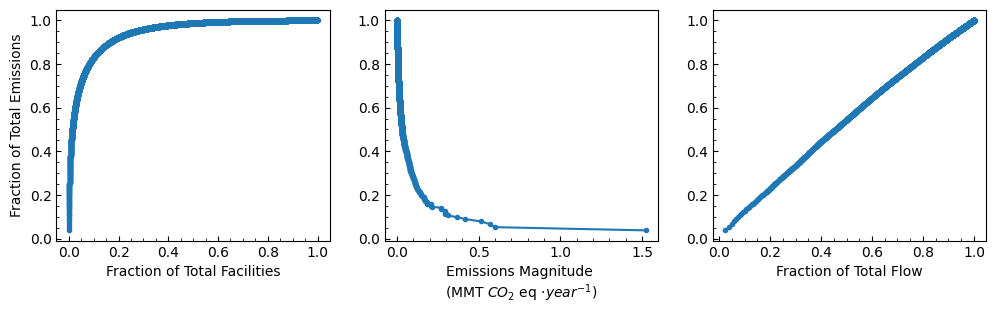

In [18]:
# Make cumulative distribution functions 

# convert kg CO2 / day to MMT / year 

def kg_co2_to_MMT(kgCO2_per_day):
    days_per_year = 365
    MT_per_day = kgCO2_per_day * (1/1000)
    MT_per_year = MT_per_day * days_per_year
    MMT_per_year = MT_per_year * (1/1E6)
    return MMT_per_year

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Create cumulative distribution function for CO2 emissions
# Step 1: Sort the DataFrame by the emissions level
sorted_facilities = facility_data.sort_values(by='kgCO2_per_day', ascending=False).reset_index(drop=True)
sorted_facilities['MMT_year'] = sorted_facilities['kgCO2_per_day'].apply(kg_co2_to_MMT)

# Step 2: Calculate the cumulative emissions
sorted_facilities['cumulative_emissions'] = sorted_facilities['kgCO2_per_day'].cumsum()

# Step 3: Optionally normalize the cumulative emissions to get the CDF
total_emissions = sorted_facilities['kgCO2_per_day'].sum()
sorted_facilities['cumulative_distribution'] = sorted_facilities['cumulative_emissions'] / total_emissions


# What fraction of facilities contribute to X% of emissions? 
sorted_facilities['facility_rank'] = sorted_facilities.index + 1
sorted_facilities['facility_fraction'] = sorted_facilities['facility_rank'] / len(sorted_facilities)
# display(sorted_facilities)

### Sorting facilities by flow & calculating cumulative flow rate 
# Sort by flow rate 
flow_sorted = facility_data.sort_values(by='flow_mgd', ascending=False).reset_index(drop=True)
# display(flow_sorted)

# Calculate the cumulative flow
flow_sorted['cumulative_flow'] = flow_sorted['flow_mgd'].cumsum()

# calculate total flow & flow fraction
total_flow = sorted_facilities['flow_mgd'].sum()
flow_sorted['flow_fraction'] = flow_sorted['cumulative_flow'] / total_flow


# Cumulative emissions
sorted_facilities['cumulative_emissions'] = sorted_facilities['kgCO2_per_day'].cumsum()

# calculate fraction of total emissions
total_emissions = sorted_facilities['kgCO2_per_day'].sum()
flow_sorted['emissions_fraction'] = sorted_facilities['cumulative_emissions'] / total_emissions
# display(flow_sorted)

########### Make plot ###########

# Figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 3))  # 3 columns 1 row 

# Common settings
marker_size = 3

axs[0].plot(sorted_facilities['facility_fraction'], sorted_facilities['cumulative_distribution'], 
            label='CDF', marker='o', markersize=marker_size)
axs[0].set_xlabel('Fraction of Total Facilities')
axs[0].set_ylabel('Fraction of Total Emissions')
# axs[0].set_title('Cumulative Distribution of Emissions vs Facility Count')
# axs[0].grid(True)

axs[1].plot(sorted_facilities['MMT_year'], sorted_facilities['cumulative_distribution'], 
            label='CDF', marker='o', markersize=marker_size)
axs[1].set_xlabel('Emissions Magnitude \n(MMT $CO_2$ eq $\cdot year^{-1}$)')
# axs[1].grid(True)

axs[2].plot(flow_sorted['flow_fraction'],  flow_sorted['emissions_fraction'], 
            label='CDF', marker='o', markersize=marker_size)
axs[2].set_xlabel('Fraction of Total Flow')
# axs[2].set_ylabel('Fraction of Total Emissions')
# axs[2].grid(True)

# Apply common settings to all subplots
for ax in axs:
    ax.minorticks_on()  # Enable minor ticks
    ax.tick_params(direction='in', which='both')  # Make tick marks face inward
    ax.grid(False)
    #ax.spines['left'].set_position('zero')
    #ax.spines['bottom'].set_position('zero')
    #ax.spines['top'].set_color('none')
    #ax.spines['right'].set_color('none')




In [19]:
# What fraction of facilities account for 80% of emissions? 90%?
display(sorted_facilities.head(10))

top_tt_count = sorted_facilities.head(10)['treatment_train'].value_counts()
print(top_tt_count)

# find index where cumulative emissions first reaches / exceed 80% (0.80) 

def find_facility_fraction(emissions_fraction): 
    index = sorted_facilities[sorted_facilities['cumulative_distribution']>=emissions_fraction].index[0]
    fraction_facilities = sorted_facilities.loc[index, 'facility_fraction']
    print(f'{fraction_facilities*100:.2f}% of facilities account of {emissions_fraction*100:.2f}% of emissions')
    return fraction_facilities
    
find_facility_fraction(0.8)
find_facility_fraction(0.9)

sorted_facilities.head(50).to_csv(pathlib.PurePath('04_results', 'facilities_sorted.csv'))

,cwns,facility,flow_mgd,kgCO2_per_day,treatment_train,co2_kg_per_day,methane_kgCO2_day,nitrous_oxide_kgCO2_per_day,electricity_kgCO2_per_day,onsite_natural_gas_kgCO2_per_day,upstream_gas_kgCO2_per_day,landfill_methane_kgCO2_per_day,land_application_N2O_kgCO2_per_day,total_kgCO2_per_day,onsite_emissions_kgCO2_per_day,MMT_year,cumulative_emissions,cumulative_distribution,facility_rank,facility_fraction
0,17000721001,"MWRDGC, Stickney Treatment Plant",1200.0,4.172748e+06,['*E1'],95392.377360,1.728623e+06,2.110234e+06,185963.235669,0.00000,0.00000,0.000000,52535.457534,4.172748e+06,3.986785e+06,1.523053,4.172748e+06,0.037490,1,0.000063
1,26000596001,GLWA WRRF,686.0,1.636254e+06,['*B5'],54532.642391,2.915062e+05,1.585830e+05,812028.568130,260778.25578,58825.64562,0.000000,0.000000,1.636254e+06,7.654001e+05,0.597233,5.809002e+06,0.052191,2,0.000126
2,17000721009,"MWRDGC, CALUMET WRP, MWRDGC",450.0,1.553553e+06,['*E1'],35772.141510,6.482335e+05,7.913378e+05,69736.213376,0.00000,0.00000,0.000000,8473.631507,1.553553e+06,1.483817e+06,0.567047,7.362555e+06,0.066148,3,0.000189
3,36002001001,New York (C) - Wards Island WPCP,550.0,1.402604e+06,"['A1', '*G1']",43721.506290,7.922854e+05,2.090792e+05,185438.134965,127739.91450,28815.22050,6719.136630,8805.078082,1.402604e+06,1.188350e+06,0.511950,8.765159e+06,0.078750,4,0.000252
4,36002001011,New York (C) - Newtown Creek WPCP,317.0,1.144406e+06,['*E1'],25199.486353,4.566445e+05,5.574535e+05,95897.138647,0.00000,0.00000,4443.998071,4767.189041,1.144406e+06,1.048509e+06,0.417708,9.909565e+06,0.089032,5,0.000315
5,25000128001,MWRA Deer Island WWTF,315.0,1.003394e+06,['*G1e'],25040.499057,4.537634e+05,1.666720e+05,159091.828066,149157.78570,33646.60530,0.000000,16021.680822,1.003394e+06,8.106554e+05,0.366239,1.091296e+07,0.098047,6,0.000378
6,55000000052,MILWAUKEE MSD COMBINED - South Shore,265.0,8.522921e+05,['A1'],21065.816667,3.817375e+05,6.126022e+04,367940.702384,0.00000,0.00000,9788.001083,10499.836127,8.522921e+05,4.843514e+05,0.311087,1.176525e+07,0.105704,7,0.000441
7,17000721007,"MWRDGC, NORTHSIDE (Terrence O'Brien) WRP",230.0,8.063459e+05,['*E1'],18283.538994,3.313193e+05,4.044615e+05,35642.953503,0.00000,0.00000,8027.354997,8611.146575,8.063459e+05,7.707029e+05,0.294316,1.257160e+07,0.112949,8,0.000504
8,48000000409,Austin 5 Year CIP - Citywide Wastewater,285.0,8.000458e+05,['A1'],22655.689623,4.105479e+05,6.588363e+04,279139.663447,0.00000,0.00000,10526.718145,11292.276589,8.000458e+05,5.209062e+05,0.292017,1.337164e+07,0.120137,9,0.000567
9,11000001001,BLUE PLAINS STP,384.0,7.971601e+05,['*A1'],30525.560755,5.531592e+05,8.876952e+04,96784.322776,0.00000,0.00000,0.000000,27921.435616,7.971601e+05,7.003757e+05,0.290963,1.416880e+07,0.127299,10,0.000630


treatment_train
['*E1']          4
['A1']           2
['*B5']          1
['A1', '*G1']    1
['*G1e']         1
['*A1']          1
Name: count, dtype: int64
8.25% of facilities account of 80.00% of emissions
16.59% of facilities account of 90.00% of emissions


## Calculate total flow 

Compare total flow in the TT spreadsheet with the facilities spreadsheet

In [20]:
# Function to convert from mgd to Mm3 to billion m3 per year 

total_flow_mgd_facilities = flow_sorted['cumulative_flow'].iloc[-1] # units: MGD 
total_flow_mm3_tt = tt_totals['flow'] # units: billion m3 / year

# Function to convert from MGD to billions m3 per year 

def mgd_to_billion_m3_yr(mgd): 
    gallons_per_m3 = 264.172
    days_per_year = 365
    millions_per_billion = 1000
    
    return mgd * days_per_year * (1/gallons_per_m3) * (1/millions_per_billion)

print(f'Total flow (billion m3/year) calculated from facility count: {mgd_to_billion_m3_yr(total_flow_mgd_facilities)}')
print(f'Total flow (billion m3 / year) calculated from treatment train summation: {total_flow_mm3_tt}')
    

Total flow (billion m3/year) calculated from facility count: 67.28727166391474
Total flow (billion m3 / year) calculated from treatment train summation: 48699.762


## Total CO2 Emissions Comparison

Compare TT spreadsheet with facilities spreadsheet


In [21]:
display(sorted_facilities)

,cwns,facility,flow_mgd,kgCO2_per_day,treatment_train,co2_kg_per_day,methane_kgCO2_day,nitrous_oxide_kgCO2_per_day,electricity_kgCO2_per_day,onsite_natural_gas_kgCO2_per_day,upstream_gas_kgCO2_per_day,landfill_methane_kgCO2_per_day,land_application_N2O_kgCO2_per_day,total_kgCO2_per_day,onsite_emissions_kgCO2_per_day,MMT_year,cumulative_emissions,cumulative_distribution,facility_rank,facility_fraction
0,17000721001,"MWRDGC, Stickney Treatment Plant",1200.000,4.172748e+06,['*E1'],95392.377360,1.728623e+06,2.110234e+06,185963.235669,0.000000,0.000000,0.000000,52535.457534,4.172748e+06,3.986785e+06,1.523053e+00,4.172748e+06,0.037490,1,0.000063
1,26000596001,GLWA WRRF,686.000,1.636254e+06,['*B5'],54532.642391,2.915062e+05,1.585830e+05,812028.568130,260778.255780,58825.645620,0.000000,0.000000,1.636254e+06,7.654001e+05,5.972328e-01,5.809002e+06,0.052191,2,0.000126
2,17000721009,"MWRDGC, CALUMET WRP, MWRDGC",450.000,1.553553e+06,['*E1'],35772.141510,6.482335e+05,7.913378e+05,69736.213376,0.000000,0.000000,0.000000,8473.631507,1.553553e+06,1.483817e+06,5.670469e-01,7.362555e+06,0.066148,3,0.000189
3,36002001001,New York (C) - Wards Island WPCP,550.000,1.402604e+06,"['A1', '*G1']",43721.506290,7.922854e+05,2.090792e+05,185438.134965,127739.914500,28815.220500,6719.136630,8805.078082,1.402604e+06,1.188350e+06,5.119503e-01,8.765159e+06,0.078750,4,0.000252
4,36002001011,New York (C) - Newtown Creek WPCP,317.000,1.144406e+06,['*E1'],25199.486353,4.566445e+05,5.574535e+05,95897.138647,0.000000,0.000000,4443.998071,4767.189041,1.144406e+06,1.048509e+06,4.177081e-01,9.909565e+06,0.089032,5,0.000315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15862,39000000178,Village of Newtown Moundview Park WWTP,0.001,2.693542e+00,['A3'],0.079494,4.249361e-01,2.311706e-01,1.841341,0.035187,0.007938,0.035449,0.038027,2.693542e+00,8.442629e-01,9.831428e-07,1.113036e+08,1.000000,15863,0.999748
15863,39008072011,New Franklin WWTP and Collection System,0.002,2.611200e+00,['A3'],0.158987,8.498723e-01,4.623412e-01,0.906799,0.070375,0.015875,0.070897,0.076053,2.611200e+00,1.688526e+00,9.530879e-07,1.113037e+08,1.000000,15864,0.999811
15864,27001103001,BARRY WWTF,0.001,1.976267e+00,['A3'],0.079494,4.249361e-01,2.311706e-01,1.124066,0.035187,0.007938,0.035449,0.038027,1.976267e+00,8.442629e-01,7.213373e-07,1.113037e+08,1.000000,15865,0.999874
15865,53000000027,SELKIRK SCHOOL DIST 70,0.001,8.650235e-01,['A3'],0.079494,4.249361e-01,2.311706e-01,0.012823,0.035187,0.007938,0.035449,0.038027,8.650235e-01,8.442629e-01,3.157336e-07,1.113037e+08,1.000000,15866,0.999937


In [22]:
total_emissions_kgCO2_day_facilities = sorted_facilities['cumulative_emissions'].iloc[-1] # cumulative emissions is kg CO2 / day 
total_emissions_MtonsCo2_year_tt = tt_totals['total_emissions_annual']

def kgCO2_day_to_MtonsCO2_year(kgCO2_day):
    kg_per_Mton = 1E6 * 1000
    days_per_year = 365
    return kgCO2_day * days_per_year * (1/kg_per_Mton)

print(f'Total emissions (Mtons CO2 / year) calculated from facility count: {kgCO2_day_to_MtonsCO2_year(total_emissions_kgCO2_day_facilities)}')
print(f'Total emissions (Mtons CO2 / year) calculated from treatment train summation: {total_emissions_MtonsCo2_year_tt}')

# There are slight differences, I expect this comes from using the electricity specific to the treatment plant vs the national average. 

# Direct emissions should be the same though 
# methane_annual              17.822711
# nitrous_oxide_annual         7.494243
# noncombustion_co2_annual     1.413032
# electricity_annual          10.649957
# onsite_gas_annual            1.541177
# upstream_gas_annual          0.347655
# landfill_methane_annual      0.961652
# land_applied_n2o_annual      1.031589
# total_emissions_annual      41.262016

emissions_minus_electricity_tt = tt_totals['methane_annual'] + \
                                 tt_totals['nitrous_oxide_annual'] + \
                                 tt_totals['noncombustion_co2_annual'] + \
                                 tt_totals['onsite_gas_annual'] + \
                                 tt_totals['upstream_gas_annual'] + \
                                 tt_totals['landfill_methane_annual'] + \
                                 tt_totals['land_applied_n2o_annual']

emissions_minus_electricity_facility = facility_data['kgCO2_per_day'].sum() - facility_data['electricity_kgCO2_per_day'].sum()

print(f'\n')
print(f'Total emissions without electricity (Mtons CO2 / year) using facilities: {kgCO2_day_to_MtonsCO2_year(emissions_minus_electricity_facility)}')

print(f'Total emissions without electriicty (Mtons CO2 / year) using treatment trains: {emissions_minus_electricity_tt}')


# Minus biosolids 

emissions_minus_elec_biosolids_facility = emissions_minus_electricity_facility - facility_data['landfill_methane_kgCO2_per_day'].sum() - facility_data['land_application_N2O_kgCO2_per_day'].sum()

emissions_minus_elec_biosolids_tt = tt_totals['methane_annual'] + \
                                 tt_totals['nitrous_oxide_annual'] + \
                                 tt_totals['noncombustion_co2_annual'] + \
                                 tt_totals['onsite_gas_annual'] + \
                                 tt_totals['upstream_gas_annual']

print(f'\n')
print(f'Total emissions without electricity OR biosolids (Mtons CO2 / year) using facilities: {kgCO2_day_to_MtonsCO2_year(emissions_minus_elec_biosolids_facility)}')

print(f'Total emissions without electriicty OR biosolids (Mtons CO2 / year) using treatment trains: {emissions_minus_elec_biosolids_tt}')


Total emissions (Mtons CO2 / year) calculated from facility count: 40.62583403020763
Total emissions (Mtons CO2 / year) calculated from treatment train summation: 42.04455718402066


Total emissions without electricity (Mtons CO2 / year) using facilities: 29.975877461900406
Total emissions without electriicty (Mtons CO2 / year) using treatment trains: 31.538955109069228


Total emissions without electricity OR biosolids (Mtons CO2 / year) using facilities: 28.618818144204663
Total emissions without electriicty OR biosolids (Mtons CO2 / year) using treatment trains: 29.527702272967485


In [23]:
display(facility_data)

print(facility_data['co2_kg_per_day'].sum()) # non combustion CO2? 
print(facility_data['electricity_kgCO2_per_day'].sum()) # electricity
display(sorted_facilities)

,cwns,facility,flow_mgd,kgCO2_per_day,treatment_train,co2_kg_per_day,methane_kgCO2_day,nitrous_oxide_kgCO2_per_day,electricity_kgCO2_per_day,onsite_natural_gas_kgCO2_per_day,upstream_gas_kgCO2_per_day,landfill_methane_kgCO2_per_day,land_application_N2O_kgCO2_per_day,total_kgCO2_per_day,onsite_emissions_kgCO2_per_day
0,1000000082,Town of Gordon - Lagoon,0.070,116.478540,['A3'],5.564555,29.745529,16.181944,56.824511,2.463125,0.555625,2.481395,2.661855,116.478540,59.098404
1,1000000094,JF Shields High School-Lagoon,0.010,16.639791,['A3'],0.794936,4.249361,2.311706,8.117787,0.351875,0.079375,0.354485,0.380265,16.639791,8.442629
2,1000000095,Leesburg WW Collection System,0.250,415.994784,['A3'],19.873412,106.234033,57.792656,202.944681,8.796875,1.984375,8.862126,9.506626,415.994784,211.065728
3,1000000096,Macon County Commission-WW Conveyance Transfer,0.030,49.919374,['A3'],2.384809,12.748084,6.935119,24.353362,1.055625,0.238125,1.063455,1.140795,49.919374,25.327887
4,1000000105,MAWSS – Wright-Smith WWTP,12.800,21492.582585,['*A3'],1017.518692,5439.182511,2958.983973,9632.450405,450.400000,101.600000,913.023559,979.423446,21492.582585,11758.532180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15862,56000300001,Atlantic City STP,0.007,21.431374,['L-f'],0.556456,15.792689,0.000000,4.546324,0.000000,0.000000,0.258551,0.277354,21.431374,16.885049
15863,56000310001,Bairoil - South Lagoon,0.007,17.893297,['L-a'],0.556456,0.000000,7.275236,9.547281,0.000000,0.000000,0.248140,0.266186,17.893297,8.346017
15864,56000310002,Bairoil - North Lagoon,0.009,27.554623,['L-f'],0.715443,20.304886,0.000000,5.845274,0.000000,0.000000,0.332423,0.356598,27.554623,21.709349
15865,56000380001,RIVERSIDE LAGOON,0.015,43.083120,['L-f'],1.192405,33.841476,0.000000,6.900871,0.000000,0.000000,0.554038,0.594330,43.083120,36.182249


3871321.728371823
29177963.20084276


,cwns,facility,flow_mgd,kgCO2_per_day,treatment_train,co2_kg_per_day,methane_kgCO2_day,nitrous_oxide_kgCO2_per_day,electricity_kgCO2_per_day,onsite_natural_gas_kgCO2_per_day,upstream_gas_kgCO2_per_day,landfill_methane_kgCO2_per_day,land_application_N2O_kgCO2_per_day,total_kgCO2_per_day,onsite_emissions_kgCO2_per_day,MMT_year,cumulative_emissions,cumulative_distribution,facility_rank,facility_fraction
0,17000721001,"MWRDGC, Stickney Treatment Plant",1200.000,4.172748e+06,['*E1'],95392.377360,1.728623e+06,2.110234e+06,185963.235669,0.000000,0.000000,0.000000,52535.457534,4.172748e+06,3.986785e+06,1.523053e+00,4.172748e+06,0.037490,1,0.000063
1,26000596001,GLWA WRRF,686.000,1.636254e+06,['*B5'],54532.642391,2.915062e+05,1.585830e+05,812028.568130,260778.255780,58825.645620,0.000000,0.000000,1.636254e+06,7.654001e+05,5.972328e-01,5.809002e+06,0.052191,2,0.000126
2,17000721009,"MWRDGC, CALUMET WRP, MWRDGC",450.000,1.553553e+06,['*E1'],35772.141510,6.482335e+05,7.913378e+05,69736.213376,0.000000,0.000000,0.000000,8473.631507,1.553553e+06,1.483817e+06,5.670469e-01,7.362555e+06,0.066148,3,0.000189
3,36002001001,New York (C) - Wards Island WPCP,550.000,1.402604e+06,"['A1', '*G1']",43721.506290,7.922854e+05,2.090792e+05,185438.134965,127739.914500,28815.220500,6719.136630,8805.078082,1.402604e+06,1.188350e+06,5.119503e-01,8.765159e+06,0.078750,4,0.000252
4,36002001011,New York (C) - Newtown Creek WPCP,317.000,1.144406e+06,['*E1'],25199.486353,4.566445e+05,5.574535e+05,95897.138647,0.000000,0.000000,4443.998071,4767.189041,1.144406e+06,1.048509e+06,4.177081e-01,9.909565e+06,0.089032,5,0.000315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15862,39000000178,Village of Newtown Moundview Park WWTP,0.001,2.693542e+00,['A3'],0.079494,4.249361e-01,2.311706e-01,1.841341,0.035187,0.007938,0.035449,0.038027,2.693542e+00,8.442629e-01,9.831428e-07,1.113036e+08,1.000000,15863,0.999748
15863,39008072011,New Franklin WWTP and Collection System,0.002,2.611200e+00,['A3'],0.158987,8.498723e-01,4.623412e-01,0.906799,0.070375,0.015875,0.070897,0.076053,2.611200e+00,1.688526e+00,9.530879e-07,1.113037e+08,1.000000,15864,0.999811
15864,27001103001,BARRY WWTF,0.001,1.976267e+00,['A3'],0.079494,4.249361e-01,2.311706e-01,1.124066,0.035187,0.007938,0.035449,0.038027,1.976267e+00,8.442629e-01,7.213373e-07,1.113037e+08,1.000000,15865,0.999874
15865,53000000027,SELKIRK SCHOOL DIST 70,0.001,8.650235e-01,['A3'],0.079494,4.249361e-01,2.311706e-01,0.012823,0.035187,0.007938,0.035449,0.038027,8.650235e-01,8.442629e-01,3.157336e-07,1.113037e+08,1.000000,15866,0.999937


In [24]:
print(sorted_facilities['kgCO2_per_day'].sum())

111303654.87728222


## National inventory results 

In [25]:
# Calculate breakdown of total emissions from facility 

national_cols = ['co2_kg_per_day', 
                 'methane_kgCO2_day', 
                 'nitrous_oxide_kgCO2_per_day', 
                 'electricity_kgCO2_per_day',
                 'onsite_natural_gas_kgCO2_per_day',
                 'upstream_gas_kgCO2_per_day', 
                 'landfill_methane_kgCO2_per_day', 
                 'land_application_N2O_kgCO2_per_day',
                 'total_kgCO2_per_day']


national_breakdown = facility_data[national_cols].sum()
display(national_breakdown)

def convert_kgCO2_daily_to_MMT_annual(kgCO2_daily): 
    kg_per_ton = 1000
    tons_per_MMT = 1E6
    days_per_year = 365
    return kgCO2_daily * (1/kg_per_ton) * (1/tons_per_MMT) * days_per_year

national_MMT_CO2_annual = pd.DataFrame()

# convert national_breakdown from kg/day to MMT / year

annual_MMT = national_breakdown.apply(convert_kgCO2_daily_to_MMT_annual)

national_breakdown_df = pd.DataFrame({
    'CO2_kg_per_day': national_breakdown,  # Original values
    'CO2_MMT_per_year': annual_MMT    # Converted values
})
new_names = ['CO2', 'methane', 'nitrous_oxide', 'electricity', 'onsite_gas', 'upstream_gas', 'landfill_methane', 'land_application_N2O', 'total']
national_breakdown_df = national_breakdown_df.rename(index={old_name: new_name for old_name, new_name in zip(national_breakdown_df.index, new_names)})

national_breakdown_df['emissions_percent'] = national_breakdown_df['CO2_kg_per_day']/national_breakdown_df['CO2_kg_per_day'].loc['total'] * 100
display(national_breakdown_df)

co2_kg_per_day                        3.871322e+06
methane_kgCO2_day                     4.882935e+07
nitrous_oxide_kgCO2_per_day           2.053217e+07
electricity_kgCO2_per_day             2.917796e+07
onsite_natural_gas_kgCO2_per_day      4.222404e+06
upstream_gas_kgCO2_per_day            9.524783e+05
landfill_methane_kgCO2_per_day        1.496006e+06
land_application_N2O_kgCO2_per_day    2.221964e+06
total_kgCO2_per_day                   1.113037e+08
dtype: float64

,CO2_kg_per_day,CO2_MMT_per_year,emissions_percent
CO2,3.871322e+06,1.413032,3.478162
methane,4.882935e+07,17.822711,43.870388
nitrous_oxide,2.053217e+07,7.494243,18.446988
electricity,2.917796e+07,10.649957,26.214740
onsite_gas,4.222404e+06,1.541177,3.793589
upstream_gas,9.524783e+05,0.347655,0.855748
landfill_methane,1.496006e+06,0.546042,1.344077
land_application_N2O,2.221964e+06,0.811017,1.996309
total,1.113037e+08,40.625834,100.000000


## Treatment train emissions 

In [26]:
# How do treatment trains compare in emissions per unit volume treated? 
# Calculate the total onsite emissions of methane, nitrous oxide, adn CO2 and the proportion of this attributable to each gas 
tt_onsite = tt_data

emissions_columns = ['code', 'count', 'flow', 'onsite_vol', 'methane_vol_percent', 'nitrous_oxide_vol_percent', 'noncombustion_co2_vol_percent', 'methane_vol', 'nitrous_oxide_vol', 'noncombustion_co2_vol', 'landfill_methane_vol', 'land_applied_n2o_vol', 'methane_annual', 'nitrous_oxide_annual', 'noncombustion_co2_annual', 'landfill_methane_annual', 'land_applied_n2o_annual', 'total_emissions_annual']

tt_onsite['onsite_vol'] = tt_onsite['methane_vol'] + tt_onsite['nitrous_oxide_vol'] + tt_onsite['noncombustion_co2_vol']

tt_onsite['methane_vol_percent'] = tt_onsite['methane_vol'] / (tt_onsite['methane_vol'] + tt_onsite['nitrous_oxide_vol'] + tt_onsite['noncombustion_co2_vol']) * 100

tt_onsite['nitrous_oxide_vol_percent'] = tt_onsite['nitrous_oxide_vol'] / (tt_onsite['methane_vol'] + tt_onsite['nitrous_oxide_vol'] + tt_onsite['noncombustion_co2_vol']) * 100 

tt_onsite['noncombustion_co2_vol_percent'] = tt_onsite['noncombustion_co2_vol'] / (tt_onsite['methane_vol'] + tt_onsite['nitrous_oxide_vol'] + tt_onsite['noncombustion_co2_vol']) * 100 

display(tt_onsite[emissions_columns].sort_values('onsite_vol', ascending=False))

display(tt_onsite[emissions_columns].sort_values('methane_vol', ascending=False))


,code,count,flow,onsite_vol,methane_vol_percent,nitrous_oxide_vol_percent,noncombustion_co2_vol_percent,methane_vol,nitrous_oxide_vol,noncombustion_co2_vol,landfill_methane_vol,land_applied_n2o_vol,methane_annual,nitrous_oxide_annual,noncombustion_co2_annual,landfill_methane_annual,land_applied_n2o_annual,total_emissions_annual
48,*E1,595,7612.390912,0.628290,60.568494,36.089092,3.342414,0.380546,0.226744,0.021,0.016532,0.021062,4.002514,2.384855,0.220875,0.173885,0.221526,8.636615
47,*E1e,80,1252.863250,0.628290,60.568494,36.089092,3.342414,0.380546,0.226744,0.021,0.016532,0.021062,0.658742,0.392505,0.036352,0.028618,0.036459,1.377936
46,L-f,1089,265.298000,0.617000,96.596424,0.000000,3.403576,0.596000,0.000000,0.021,0.008216,0.010467,0.218467,0.000000,0.007698,0.003012,0.003837,0.264411
45,L-n,66,27.639500,0.617000,96.596424,0.000000,3.403576,0.596000,0.000000,0.021,0.008216,0.010467,0.022760,0.000000,0.000802,0.000314,0.000400,0.026966
44,*D1e,1,46.000000,0.594424,64.019306,32.447850,3.532844,0.380546,0.192878,0.021,0.016532,0.021062,0.024186,0.012259,0.001335,0.001051,0.001339,0.092251
43,F1,57,416.270250,0.594424,64.019306,32.447850,3.532844,0.380546,0.192878,0.021,0.008216,0.010467,0.218870,0.110933,0.012078,0.004725,0.006020,0.468255
42,*G1,90,1478.479833,0.594424,64.019306,32.447850,3.532844,0.380546,0.192878,0.021,0.016532,0.021062,0.777369,0.394005,0.042898,0.033772,0.043025,2.059621
41,F1e,17,238.820417,0.594424,64.019306,32.447850,3.532844,0.380546,0.192878,0.021,0.008216,0.010467,0.125569,0.063644,0.006929,0.002711,0.003454,0.261879
40,*G1-p,21,287.440000,0.594424,64.019306,32.447850,3.532844,0.380546,0.192878,0.021,0.016532,0.021062,0.151133,0.076601,0.008340,0.006566,0.008365,0.346639
39,*G1e,33,1559.025000,0.594424,64.019306,32.447850,3.532844,0.380546,0.192878,0.021,0.016532,0.021062,0.819719,0.415470,0.045235,0.035612,0.045369,1.937014


,code,count,flow,onsite_vol,methane_vol_percent,nitrous_oxide_vol_percent,noncombustion_co2_vol_percent,methane_vol,nitrous_oxide_vol,noncombustion_co2_vol,landfill_methane_vol,land_applied_n2o_vol,methane_annual,nitrous_oxide_annual,noncombustion_co2_annual,landfill_methane_annual,land_applied_n2o_annual,total_emissions_annual
46,L-f,1089,265.298000,0.617000,96.596424,0.000000,3.403576,0.596000,0.000000,0.021,0.008216,0.010467,0.218467,0.000000,0.007698,0.003012,0.003837,0.264411
45,L-n,66,27.639500,0.617000,96.596424,0.000000,3.403576,0.596000,0.000000,0.021,0.008216,0.010467,0.022760,0.000000,0.000802,0.000314,0.000400,0.026966
48,*E1,595,7612.390912,0.628290,60.568494,36.089092,3.342414,0.380546,0.226744,0.021,0.016532,0.021062,4.002514,2.384855,0.220875,0.173885,0.221526,8.636615
36,*A2,1,9.600000,0.449209,84.714716,10.610384,4.674900,0.380546,0.047663,0.021,0.016532,0.021062,0.005048,0.000632,0.000279,0.000219,0.000279,0.008080
29,*C1e,76,1184.453333,0.449209,84.714716,10.610384,4.674900,0.380546,0.047663,0.021,0.016532,0.021062,0.622773,0.078001,0.034367,0.027056,0.034468,0.924212
30,*A1e,194,4010.098250,0.449209,84.714716,10.610384,4.674900,0.380546,0.047663,0.021,0.016532,0.021062,2.108467,0.264082,0.116354,0.091600,0.116697,3.073790
31,*B1e,21,1670.125000,0.449209,84.714716,10.610384,4.674900,0.380546,0.047663,0.021,0.016532,0.021062,0.878134,0.109985,0.048459,0.038150,0.048602,1.288028
32,A1e,12,208.568000,0.449209,84.714716,10.610384,4.674900,0.380546,0.047663,0.021,0.008216,0.010467,0.109663,0.013735,0.006052,0.002368,0.003016,0.197019
33,*C1,1272,3137.577733,0.449209,84.714716,10.610384,4.674900,0.380546,0.047663,0.021,0.016532,0.021062,1.649705,0.206623,0.091037,0.071670,0.091306,2.658491
34,*A1,805,5227.744667,0.449209,84.714716,10.610384,4.674900,0.380546,0.047663,0.021,0.016532,0.021062,2.748693,0.344269,0.151684,0.119414,0.152131,4.443537


In [27]:
# Which treatment trains contribute the most emissions on a national scale? 
# Question: do I want to consider total emissions here or onsite emissions? 

# I think start with just onsite emissions because the biosolids are just a proportion of flow rate...but then why not just include total? 

# Note: units for annual emissions are million tons of CO2 per year 
tt_onsite_annual = tt_data

tt_onsite_annual['onsite_annual'] = tt_onsite_annual['methane_annual'] + tt_onsite_annual['nitrous_oxide_annual'] + tt_onsite_annual['noncombustion_co2_annual']
total_emissions_columns = ['code', 'count', 'flow', 'onsite_annual', 'methane_annual', 'nitrous_oxide_annual', 'noncombustion_co2_annual']

display(tt_onsite_annual[total_emissions_columns].sort_values('onsite_annual', ascending=False))

# which emissions contribute the most nationally to methane? 

display(tt_onsite_annual[total_emissions_columns].sort_values('methane_annual', ascending=False))


,code,count,flow,onsite_annual,methane_annual,nitrous_oxide_annual,noncombustion_co2_annual
48,*E1,595,7612.390912,6.608245,4.002514,2.384855,0.220875
34,*A1,805,5227.744667,3.244646,2.748693,0.344269,0.151684
30,*A1e,194,4010.098250,2.488903,2.108467,0.264082,0.116354
33,*C1,1272,3137.577733,1.947365,1.649705,0.206623,0.091037
39,*G1e,33,1559.025000,1.280424,0.819719,0.415470,0.045235
42,*G1,90,1478.479833,1.214273,0.777369,0.394005,0.042898
47,*E1e,80,1252.863250,1.087599,0.658742,0.392505,0.036352
15,A3,4308,4310.206883,1.077427,0.668520,0.283846,0.125061
31,*B1e,21,1670.125000,1.036578,0.878134,0.109985,0.048459
26,L-u,4786,1821.068333,0.873518,0.240771,0.579909,0.052839


,code,count,flow,onsite_annual,methane_annual,nitrous_oxide_annual,noncombustion_co2_annual
48,*E1,595,7612.390912,6.608245,4.002514,2.384855,0.220875
34,*A1,805,5227.744667,3.244646,2.748693,0.344269,0.151684
30,*A1e,194,4010.098250,2.488903,2.108467,0.264082,0.116354
33,*C1,1272,3137.577733,1.947365,1.649705,0.206623,0.091037
31,*B1e,21,1670.125000,1.036578,0.878134,0.109985,0.048459
39,*G1e,33,1559.025000,1.280424,0.819719,0.415470,0.045235
42,*G1,90,1478.479833,1.214273,0.777369,0.394005,0.042898
37,A1,294,1298.883917,0.806164,0.682939,0.085537,0.037687
15,A3,4308,4310.206883,1.077427,0.668520,0.283846,0.125061
47,*E1e,80,1252.863250,1.087599,0.658742,0.392505,0.036352


In [28]:
# Note: need to run previous cell 

# What are total emissions from A trains? 
all_a = tt_onsite_annual.loc[tt_onsite_annual['code'].isin(['A1', '*A1', '*A1e', '*A2']), 'onsite_annual'].sum()

print(f'Annual emissions (millions tons CO2 / year) from all A trains: {all_a}')

Annual emissions (millions tons CO2 / year) from all A trains: 6.5456709487629166


In [29]:
# Note: need to run previous cell 

# What are total emissions from all lagoons? 
all_lagoons = tt_onsite_annual.loc[tt_onsite_annual['code'].isin(['L-f', 'L-u', 'L-a', 'L-n']), 'onsite_annual'].sum()

print(f'Annual emissions (millions tons CO2 / year) from all lagoons: {all_lagoons}')

Annual emissions (millions tons CO2 / year) from all lagoons: 1.7486922367905853


In [30]:
# Note: need to run previous cell 

# What are total emissions from all nitrifying plants? 
all_e = tt_onsite_annual.loc[tt_onsite_annual['code'].isin(['*E1', 'E3', '*E3']), 'onsite_annual'].sum()

print(f'Annual emissions (millions tons CO2 / year) from all nitrifying trains: {all_e}')

Annual emissions (millions tons CO2 / year) from all nitrifying trains: 7.245077569763346


In [31]:
# What are total emissions for each treatment train, using national average carbon intensity of the grid? 

tt_total_carbon_vol = tt_data

tt_total_carbon_vol['percent_onsite'] = (tt_total_carbon_vol['methane_vol'] + tt_total_carbon_vol['nitrous_oxide_vol'] + tt_total_carbon_vol['noncombustion_co2_vol']) / tt_total_carbon_vol['total_emissions_national_ave_vol'] * 100

tt_total_carbon_vol['percent_electricity_gas'] = (tt_total_carbon_vol['electricity_national_vol'] + tt_total_carbon_vol['onsite_gas_vol'] + tt_total_carbon_vol['upstream_gas_vol'])/ tt_total_carbon_vol['total_emissions_national_ave_vol'] * 100

tt_total_carbon_vol['percent_biosolids'] = (tt_total_carbon_vol['landfill_methane_vol'] + tt_total_carbon_vol['land_applied_n2o_vol'])/ tt_total_carbon_vol['total_emissions_national_ave_vol'] * 100

tt_total_carbon_vol['check'] = tt_total_carbon_vol['percent_biosolids'] + tt_total_carbon_vol['percent_onsite'] + tt_total_carbon_vol['percent_electricity_gas']

total_carbon_cols = ['code', 'count', 'flow', 'total_emissions_national_ave_vol', 'percent_onsite', 'percent_electricity_gas', 'percent_biosolids', 'check' ]

# units of total emissions are kg CO2 / m3 
display(tt_total_carbon_vol[total_carbon_cols].sort_values('total_emissions_national_ave_vol', ascending=False))

display(tt_total_carbon_vol[total_carbon_cols].sort_values('percent_electricity_gas', ascending=False))

,code,count,flow,total_emissions_national_ave_vol,percent_onsite,percent_electricity_gas,percent_biosolids,check
44,*D1e,1,46.000000,1.607778,36.971770,60.689947,2.338283,100.0
25,*D3,3,1.430000,1.317834,24.747766,72.514368,2.737866,100.0
42,*G1,90,1478.479833,1.000610,59.406171,36.836681,3.757149,100.0
39,*G1e,33,1559.025000,0.949187,62.624547,33.414758,3.960695,100.0
40,*G1-p,21,287.440000,0.888939,66.868920,28.901949,4.229131,100.0
43,F1,57,416.270250,0.850733,69.871931,27.931952,2.196117,100.0
48,*E1,595,7612.390912,0.835836,75.169116,20.333064,4.497820,100.0
38,*G1e-p,6,41.508333,0.834573,71.224918,24.270456,4.504626,100.0
20,*G5,14,204.683333,0.827845,39.395567,60.604433,0.000000,100.0
41,F1e,17,238.820417,0.809546,73.426818,24.265333,2.307849,100.0


,code,count,flow,total_emissions_national_ave_vol,percent_onsite,percent_electricity_gas,percent_biosolids,check
25,*D3,3,1.430000,1.317834,24.747766,72.514368,2.737866,100.0
12,A5,10,56.514167,0.478133,37.838720,62.161280,0.000000,100.0
11,*B5,10,532.803000,0.466642,38.770531,61.229469,0.000000,100.0
44,*D1e,1,46.000000,1.607778,36.971770,60.689947,2.338283,100.0
20,*G5,14,204.683333,0.827845,39.395567,60.604433,0.000000,100.0
8,*A5,86,1668.520000,0.455860,39.687506,60.312494,0.000000,100.0
2,*C5,21,289.976000,0.428676,42.204267,57.795733,0.000000,100.0
18,*G6,22,202.105833,0.739669,44.091922,55.908078,0.000000,100.0
10,A6,6,64.310000,0.389957,46.394723,53.605277,0.000000,100.0
24,*G3,76,382.223667,0.779346,41.847173,53.523240,4.629587,100.0


In [32]:
# EPA inventory breakdown 

epa_methane_treatment = 11.6 # MMT / year in 2022
epa_methane_effluent = 2.0 # MMT / year in 2022
epa_n2o_treatment = 17.0 # MMT / year in 2022 
epa_n2o_effluent = 4.4 

epa_total_onsite = epa_methane_effluent + epa_methane_treatment + epa_n2o_effluent + epa_n2o_treatment
epa_treatment_only = epa_methane_treatment + epa_n2o_treatment

print(f'EPA emissions total (MMT / year): {epa_total_onsite}')
print(f'EPA emissions onsite only (MMT / year): {epa_treatment_only}')

print(f'EPA fraction of onsite emissions from methane: {epa_methane_treatment/epa_treatment_only *100:0.2f}%')
print(f'EPA fraction of onsite emissions from nitrous oxide: {epa_n2o_treatment/epa_treatment_only *100:0.2f}%')

our_methane = 18.0 # MMT / year
our_nitrous_oxide = 7.5 # MMT / year

print(f'In our inventory, methane fraction of onsite emissions: {our_methane/(our_methane+our_nitrous_oxide)*100:.2f}%')

print(f'In our inventory, methane fraction of onsite emissions: {our_nitrous_oxide/(our_methane+our_nitrous_oxide)*100:.2f}%')

EPA emissions total (MMT / year): 35.0
EPA emissions onsite only (MMT / year): 28.6
EPA fraction of onsite emissions from methane: 40.56%
EPA fraction of onsite emissions from nitrous oxide: 59.44%
In our inventory, methane fraction of onsite emissions: 70.59%
In our inventory, methane fraction of onsite emissions: 29.41%


## Tradeoff between CHP and Anaerobic digestion

look at faiclities with and without electricity capture to see what difference it makes 

In [33]:
# Trains of interest: 
# *G1 vs *G1e 
# F1 vs F1e
# *B1 vs *B1e
# *A1 vs *A1e


codes_AD = ['*G1', '*G1e', 'F1', 'F1e', '*B1', '*B1e', '*A1', '*A1e']
tt_ad = tt_data


ad_cols = ['code', 'electricity_national_vol', 'methane_vol']
tt_ad.loc[tt_ad['code'].isin(codes_AD)][ad_cols].sort_values(by='code', ascending=True)

# units: methane_vol is in kg CO2 eq / m3 
#       electricity_national_vol is in kg CO2 eq / m3 

,code,electricity_national_vol,methane_vol
34,*A1,0.136710,0.380546
30,*A1e,0.075612,0.380546
35,*B1,0.149821,0.380546
31,*B1e,0.088469,0.380546
42,*G1,0.218200,0.380546
39,*G1e,0.163861,0.380546
43,F1,0.237626,0.380546
41,F1e,0.196439,0.380546


In [34]:
# What is the emissions savings from electricity? 
def compare_energy_savings(code1, code2): 
    diff = tt_ad.loc[tt_ad['code']== code1]['electricity_national_vol'].iloc[0] - tt_ad.loc[tt_ad['code']==code2]['electricity_national_vol'].iloc[0]
    print(f'Energy savings for {code2} vs {code1} {diff:0.4f} kg CO2 eq/m3')


compare_energy_savings('*A1', '*A1e')
compare_energy_savings('*B1', '*B1e')
compare_energy_savings('*G1', '*G1e')
compare_energy_savings('F1', 'F1e')

Energy savings for *A1e vs *A1 0.0611 kg CO2 eq/m3
Energy savings for *B1e vs *B1 0.0614 kg CO2 eq/m3
Energy savings for *G1e vs *G1 0.0543 kg CO2 eq/m3
Energy savings for F1e vs F1 0.0412 kg CO2 eq/m3
